# Testing Simple Laplace Algorithm for $\varepsilon$-DP

In [1]:
# Required to get the plots inline for Census implementation.
%matplotlib inline

# Load the libraries we need.
import matplotlib.pyplot as plt
import math
import numpy as np
from IPython.display import HTML, display
#import tabulate # Appears not to be available in local Python distro.
import pandas as pd
from IPython.display import display, Math # Support LaTeX-formatted outputs.
from IPython.display import Latex
from IPython.display import Markdown

# Basic Setup for Laplace Distribution

$PDF_{Laplace}=\frac{1}{2b}e^{\frac{-\left|x-\mu\right|}{b}}$

$\mu=$ Location

$b=$ Scale $=\frac{Sensitivity}{\varepsilon}$

Typically in DP usage we set the location, $\mu$, to 0. This leaves us with:

$PDF_{Laplace}=\frac{1}{2b}e^{\frac{-\left|x\right|}{b}}$

In [89]:
# Set the parameter for the privacy mechanism.
epsilon=2.
sensitivity=1.
scale=sensitivity/epsilon

print("Epsilon: {:4.2f}".format(epsilon))
print("Sensitivity: {:4.2f}".format(sensitivity) )
print("Scale: {:4.2f}".format(scale))



invscale=1/scale
lapconst=invscale/2.
display(Markdown(
    rf"""
$PDF_{{Laplace}}={lapconst}\cdot e^{{-{invscale}\cdot\left|x\right|}}$
"""))



Epsilon: 2.00
Sensitivity: 1.00
Scale: 0.50



$PDF_{Laplace}=1.0\cdot e^{-2.0\cdot\left|x\right|}$


# Define parameters for sampling

In [99]:

# Parameters for the data
minval=1
maxval=10
numsamples=10000
numbins=20


# Create Laplace Noise

Using 20 bins


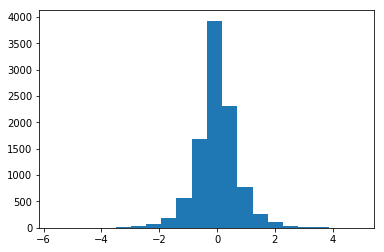

In [100]:
# Generate the noise 
noise = np.random.laplace(0,sensitivity/epsilon,numsamples)

# Display an histogram of the noise
histbincnt=max(20,min(numbins/100,50))
print("Using {:d} bins".format(histbincnt))
histnoise=plt.hist(noise,histbincnt)



# Create some random data

In [86]:
# Create a random dataset.
x = np.ceil(np.random.uniform(minval,maxval,numsamples))

# Display an histogram of the data
histbincnt=max(20,min(numbins/100,50))
print("Using %d bins" % histbincnt)
histdata=plt.hist(x,histbincnt)


Using 20 bins


# Create Noisy Data

In [87]:
y = x + noise

# Display an histogram of the noisy data
histbincnt=max(20,min(numbins/100,50))
print("Using %d bins" % histbincnt)
histdata=plt.hist(y,histbincnt)

Using 20 bins


# Calculate L1 Error

In [59]:
L1 = np.linalg.norm(y-x,1)
print("Absolute L1 Error: " + "{:.8}".format(L1))

print("also")
L1rel = L1 / np.linalg.norm(x,1)
print("Relative Error: " + "{:.8%}".format(L1rel))

Absolute L1 Error: 5002.3693
also
Relative Error: 0.09957560%


# Old Code

In [ ]:
bins=[0,10,20,30,40,50,60,70,80,90,101]
x = np.ceil(np.random.uniform(0,100,100))
x1 = np.append(x,52)
print(x1)
x = np.random.laplace(0,1,100)
y = pd.DataFrame(x, columns=["Age"])
y1 = pd.DataFrame(x1, columns=["Age"])
#display(HTML(tabulate.tabulate(y, tablefmt='html')))
#print(y)
#plt.hist(x,bins=bins)
plt.hist(x)

(array([ 7., 10.,  4.,  7.,  3.,  5.,  5.,  4.,  5.,  7.,  5.,  2.,  6.,
         4.,  1.,  5.,  5.,  4.,  4.,  8.]),
 array([  1.  ,   5.95,  10.9 ,  15.85,  20.8 ,  25.75,  30.7 ,  35.65,
         40.6 ,  45.55,  50.5 ,  55.45,  60.4 ,  65.35,  70.3 ,  75.25,
         80.2 ,  85.15,  90.1 ,  95.05, 100.  ]),
 <a list of 20 Patch objects>)

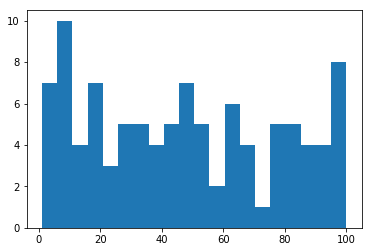

In [68]:
plt.hist(x1,20)
#print(x)